In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from reader import cifar100

In [2]:
seed = 100
if seed is not None:
    np.random.seed(seed)
    tf.set_random_seed(seed)

In [3]:
raw_dir = 'D:/Machine_Learning/Datasets/Cifar_100/train'
tfr_dir = 'D:/Machine_Learning/Datasets/Cifar_100/test'



in_subclass = np.random.choice(20, 16, replace=False)
in_subclass.sort()

tmp = 5 * np.expand_dims(in_subclass, axis=1)
in_class = np.reshape(tmp + np.array([[rr for rr in range(5)]]), (-1,1))
np.shape(in_class)

(80, 1)

In [4]:
c100 = cifar100.main(raw_dir=raw_dir, tfr_dir=tfr_dir)
c100.raw_in_classes = in_class[:,0]

Downloading fails sometimes in notebooks? - Not sure why. If it fails, download the tar file manually (c100.websites) and extract it in raw_dir.

In [5]:
c100.download()

>> Downloading cifar-100-binary.tar.gz 100.0%
Successfully downloaded cifar-100-binary.tar.gz 168513733 bytes.


This will create the tfrecords in tfr_dir

In [11]:
c100.create_tfrs()

This will create the various tf objects for reading data:

You can actually just call build_iterators without calling download and create_tfrs. It will automatically call them if they don't already exist.

Similarly, if you do any of the process manually and don't match the paths up consistently it will attempt to fill in any missing pieces.
- You can skip auto_downloading by setting c100.auto_download = False

In [12]:
# Batch size should accept a placeholder
iterator, training_dataset, testing_dataset, valid_dataset = c100.build_iterators(batch_size=64, drop_remainder=False)

Note, valid_dataset is currently empty because the code expects a separate raw file for each data set and I haven't had time to generalize yet...

In [14]:
training_init_op = iterator.make_initializer(training_dataset)

images_iter, labels_iter = iterator.get_next()

In [16]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    sess.run(training_init_op)
    
    image, label = sess.run([images_iter, labels_iter])

Check that the data was read correctly:

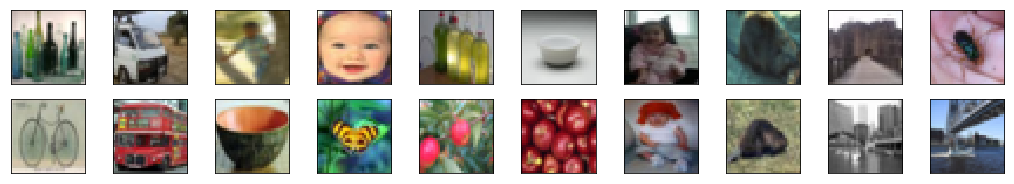

In [19]:
fig, ax = plt.subplots( 2, 10, figsize=(18, 3) )

for nn in range(10):
    ax[0,nn].get_xaxis().set_visible(False)
    ax[0,nn].get_yaxis().set_visible(False)
    ax[1,nn].get_xaxis().set_visible(False)
    ax[1,nn].get_yaxis().set_visible(False)
    
    img = np.squeeze(image[nn,:,:,:])
    rec = np.squeeze(image[nn+10,:,:,:])
    
    ax[0,nn].imshow(img)
    ax[1,nn].imshow(rec)